<a href="https://colab.research.google.com/github/kumargv/HackathonPhysics_Amin_Julien_Avishek_Kumar/blob/master/IEEE_YP_Workshop_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

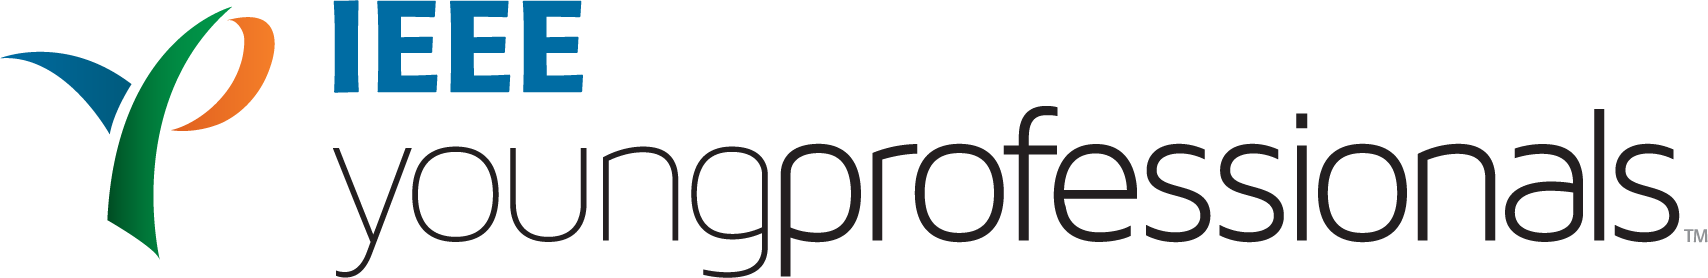

---

# <center>Python Workshop on Computer Vision and Deep Learning</center>

The advent of deep learning and open-source code has made  computer vision universally applicable in solving real-world problems. For example, the handwritten digit recognition model developed by Yann LeCun in 1989 has paved the way for today’s deep convolutional neural networks. Since then, the computer vision field has expanded immensely to include applications in medical, automotive, and construction domains, for example. This workshop will provide a detailed open-source walkthrough  of core concepts in the field and some recent implementations.

---

# Core Concepts

##Neural Network

To understand how computer vision is implemented in deep learning, we will first look at the fundamentals of neural networks. Code for this section is adapted from a [repository](https://github.com/andrfish/MDQL-with-MNFQ) under the [GNU General Public License v3.0](https://choosealicense.com/licenses/gpl-3.0/) for [Fisher et al's publication in 2020](https://ieeexplore.ieee.org/document/9093004)

### Neuron

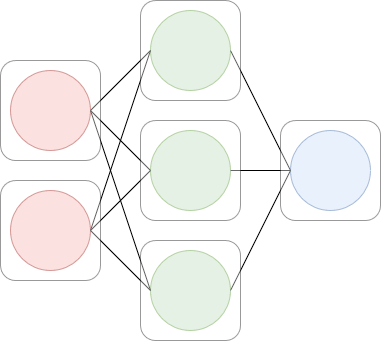

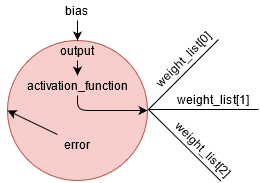

In [1]:
import random

class neuron():
  def __init__(self, numb_weights, activation_function = None):
    # Initialize this neuron
    self.weight_list = []
    for _i in range(numb_weights):
      # Generate a weight between -1 to 1
      rnd_weight = (random.random() * 2) - 1
      self.weight_list.append(rnd_weight)

    self.activation_function = activation_function

    self.bias = 0.0
    self.output = 0.0
    self.error = 0.0

  def activate(self):
    # Check that the activation function has been set
    if (self.activation_function == None):
      raise Exception("The activation function has not been set")
    
    self.output = self.activation_function(self.output)

In [2]:
class activation_functions():
  def sigmoid(x):
    y = 1 / (1 + math.exp(-x))
    return y * (1 - y)

### Layers

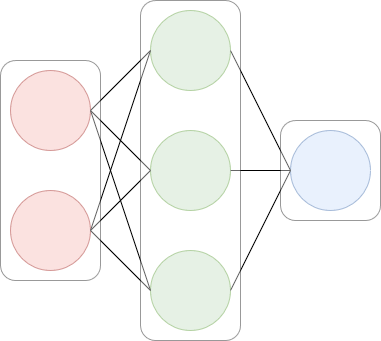

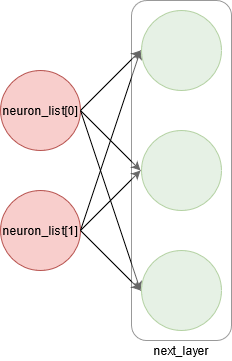

In [3]:
class layer():
  def __init__(self, size, activation_function = None, next_layer = None):
    # Initialize this layer
    self.neuron_list = []
    weights = 0 if next_layer == None else len(next_layer.neuron_list)
    for _i in range(size):
      self.neuron_list(weights, activation_function)

    self.next_layer = next_layer
    self.activation_function = activation_function
  
  def propagate_forward(self):
    # Check if the next layer has been set
    if (self.next_layer == None):
      raise Exception("The next layer has not been set")

    # Check if the neuron list has been set
    if (self.neuron_list == None):
      raise Exception("The neuron list has not been set")

    # Set the outputs in the next layer to zero
    for node in self.next_layer.neuron_list:
      node.output = 0

    # Cycle through each node in this layer
    for node in self.neuron_list:
      # Ensure this node is connected to all nodes in the next layer
      if (len(node.weight_list) != len(self.next_layer.neuron_list)):
        raise Exception("The number of weights for this node does not equal " +
                        "the number of neurons in the next layer")
        
      # Propagate its values to each node in the next layer
      for index in range(len(self.next_layer.neuron_list)):
        next_node = self.next_layer.neuron_list[index]
        next_node.output += node.output * node.weight_list[index]

    # Add each node's bias
    for next_node in self.next_layer.neuron_list:
      next_node.output += next_node.bias

    # Activate each neuron in the next layer if applicable
    if (self.next_layer.activation_function != None):
      for next_node in self.next_layer.neuron_list:
        next_node.activate()

### TensorFlow

Instead of coding our own functions, let's use the open-source library [TensorFlow](https://www.tensorflow.org/) that has been on [GitHub since 2015](https://github.com/tensorflow/tensorflow):

In [4]:
%tensorflow_version 1.x
import tensorflow as tf

TensorFlow 1.x selected.


In [5]:
# The methods we defined before for "layer" and "neuron" can be simplified
# with TensorFlow's "Dense" method:
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense

def dense_example():
  tf.keras.layers.Dense(
      units, activation=None, use_bias=True,
  )

In [6]:
# To connect the layers, we can use TensorFlow's "Sequential" method:
# https://www.tensorflow.org/api_docs/python/tf/keras/Sequential

def sequential_example():
  tf.keras.Sequential(
    layers=None, name=None
  )

Consider the following code to create this simple neural network:

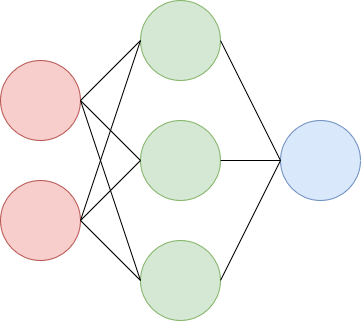

In [7]:
# Initialize a "Sequential" object
model = tf.keras.Sequential()

# Define the first hidden layer along with the input layer
model.add(tf.keras.layers.Dense(3, activation="sigmoid", 
                                input_shape=(2,)))

# Define the output layer
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-159cb9873e95>", line 6, in <module>
    input_shape=(2,)))
  File "/tensorflow-1.15.2/python3.7/tensorflow_core/python/training/tracking/base.py", line 457, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "/tensorflow-1.15.2/python3.7/tensorflow_core/python/keras/engine/sequential.py", line 173, in add
    batch_shape=batch_shape, dtype=dtype, name=layer.name + '_input')
  File "/tensorflow-1.15.2/python3.7/tensorflow_core/python/keras/engine/input_layer.py", line 265, in Input
    input_layer = InputLayer(**input_layer_config)
  File "/tensorflow-1.15.2/python3.7/tensorflow_core/python/keras/engine/input_layer.py", line 126, in __init__
    ragged=ragged)
  File "/tensorflow-1.15.2/python3.7/tensorflow_core/python/keras/backend.py", line 1051, in pl

KeyboardInterrupt: ignored

### Back-Propagation

To give this model the ability to learn datasets, an algorithm called "back-propagation" is commonly used. However, to keep this workshop focused on computer vision, we won't dive into the details as we can simply look at TensorFlow's "[compile](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile)" function:

In [ ]:
model.compile(optimizer='sgd', loss='mse')

## Convolution Layer

To apply neural networks to images, we will look at "convolution layers". For the implementations we will look at, this is the "[Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D)" method in TensorFlow:

In [ ]:
def conv2d_example():
  tf.keras.layers.Conv2D(
      filters, kernel_size, strides=(1, 1), activation=None, use_bias=True
  )

To understand this method better, let's first look at the "MaxPool2D" method which implements "max-pooling" layers:

In [ ]:
def max_pooling_example():
  tf.keras.layers.MaxPool2D(
      pool_size=(2, 2), strides=2
  )

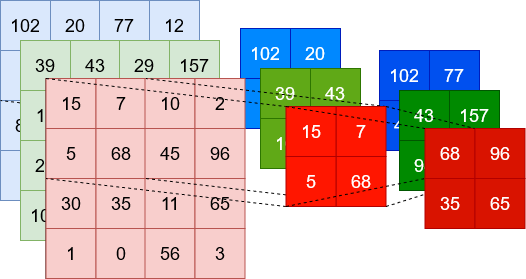

For the convolution layers, these filters are instead a matrix of what we can consider "weights" similar to the neural network implementation:

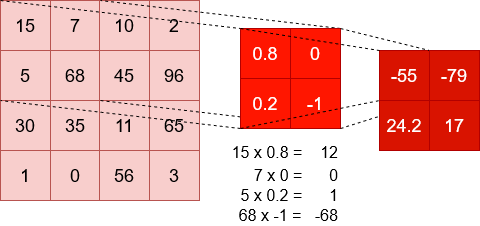

The resulting convolutional neural network works to update these parameters to better extract desired features from the input image

# Implementations

### [Handwritten Digit Recognition with a Back-Propagation Network](https://proceedings.neurips.cc/paper/1989/file/53c3bce66e43be4f209556518c2fcb54-Paper.pdf)

The codebase used for this implementation is available under the [MIT License](https://choosealicense.com/licenses/mit/) at the following repository:

https://github.com/ganyc717/LeNet

In [ ]:
# This snippet is from the "lenet.py" file in the repo showing us the
# setup of the model using TensorFlow
def lenet_model():
  model = slim.conv2d(self.input_images,6,[5,5],1,padding='SAME',scope='conv1')
  net = slim.max_pool2d(net, [2, 2], scope='pool2')
  net = slim.conv2d(net,16,[5,5],1,scope='conv3')
  net = slim.max_pool2d(net, [2, 2], scope='pool4')
  net = slim.conv2d(net,120,[5,5],1,scope='conv5')
  net = slim.flatten(net, scope='flat6')
  net = slim.fully_connected(net, 84, scope='fc7')
  net = slim.dropout(net, self.dropout,is_training=is_trained, scope='dropout8')
  digits = slim.fully_connected(net, 10, scope='fc9')
  return digits

In [ ]:
# Let's clone the repository to have access to the codebase
%cd /content
!git clone https://github.com/ganyc717/LeNet.git

/content
Cloning into 'LeNet'...
remote: Enumerating objects: 56, done.
remote: Total 56 (delta 0), reused 0 (delta 0), pack-reused 56
Unpacking objects: 100% (56/56), done.


Within this codebase, the [original dataset](http://yann.lecun.com/exdb/mnist/) used by [the authors](https://proceedings.neurips.cc/paper/1989/file/53c3bce66e43be4f209556518c2fcb54-Paper.pdf) is provided under the "MNIST_data" directory

In [ ]:
# This snippet of code is from the "Train.py" file in the repo showing us
# how the training epochs are ran using TensorFlow's "Session"

def lenet_training():
  for i in range(max_iter):
      batch = mnist.train.next_batch(50)
      if i % 100 == 0:
          train_accuracy = sess.run(lenet.train_accuracy,feed_dict={
              lenet.raw_input_image: batch[0],lenet.raw_input_label: batch[1]
          })
          print("step %d, training accuracy %g" % (i, train_accuracy))
      sess.run(lenet.train_op,feed_dict={lenet.raw_input_image: batch[0],lenet.raw_input_label: batch[1]})

Let's use the author's "Train.py" file to evaluate this model

In [ ]:
# Switch to version 1.x for better compatibility
%tensorflow_version 1.x
%cd /content/LeNet/

# Fixes an import issue present in the script
!sed -i 's/import tensorflow.examples.tutorials.mnist.input_data as input_data/from tensorflow.examples.tutorials.mnist import input_data/g' Train.py

# Try to reduce the amount of logging information
%env TF_CPP_MIN_LOG_LEVEL= '3'

# Runs the training script
!python Train.py

/content/LeNet
env: TF_CPP_MIN_LOG_LEVEL='3'
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
I

To see a visual example of how this works, check out the following link:

https://www.cs.ryerson.ca/~aharley/vis/conv/

### [ImageNet Classification with Deep Convolutional Neural Networks](https://kr.nvidia.com/content/tesla/pdf/machine-learning/imagenet-classification-with-deep-convolutional-nn.pdf)

The codebase used for this implementation is available under the [MIT License](https://choosealicense.com/licenses/mit/) at the following repository: 

https://github.com/jireh-father/tensorflow-alexnet.git

However, it is outdated and consequently has a few bugs. So, we will instead be pulling from my fork of the repository which has some fixes in place: 

https://github.com/andrfish/tensorflow-alexnet

In [ ]:
# This is a snippet of the model architecture from
# "simple_kaggle_mnist_alexnet.py"

def alexnet_model():
  inputs = tf.placeholder("float", [None, image_size, image_size, image_channel])
  labels = tf.placeholder("float", [None, label_cnt])
  dropout_keep_prob = tf.placeholder("float", None)
  learning_rate_ph = tf.placeholder("float", None)

  # conv layer 1
  conv1_weights = tf.Variable(tf.random_normal([7, 7, image_channel, 96], dtype=tf.float32, stddev=0.01))
  conv1_biases = tf.Variable(tf.constant(0.0, shape=[96], dtype=tf.float32))
  conv1 = tf.nn.conv2d(inputs, conv1_weights, [1, 3, 3, 1], padding='SAME')
  conv1 = tf.nn.bias_add(conv1, conv1_biases)
  conv1_relu = tf.nn.relu(conv1)
  conv1_norm = tf.nn.local_response_normalization(conv1_relu, depth_radius=2, alpha=0.0001, beta=0.75, bias=1.0)
  conv1_pool = tf.nn.max_pool(conv1_norm, ksize=[1, 2, 2, 1], strides=[1, 1, 1, 1], padding='VALID')

  # conv layer 2
  conv2_weights = tf.Variable(tf.random_normal([5, 5, 96, 256], dtype=tf.float32, stddev=0.01))
  conv2_biases = tf.Variable(tf.constant(1.0, shape=[256], dtype=tf.float32))
  conv2 = tf.nn.conv2d(conv1_pool, conv2_weights, [1, 1, 1, 1], padding='SAME')
  conv2 = tf.nn.bias_add(conv2, conv2_biases)
  conv2_relu = tf.nn.relu(conv2)
  conv2_norm = tf.nn.local_response_normalization(conv2_relu)
  conv2_pool = tf.nn.max_pool(conv2_norm, ksize=[1, 2, 2, 1], strides=[1, 1, 1, 1], padding='VALID')

  # conv layer 3
  conv3_weights = tf.Variable(tf.random_normal([3, 3, 256, 384], dtype=tf.float32, stddev=0.01))
  conv3_biases = tf.Variable(tf.constant(0.0, shape=[384], dtype=tf.float32))
  conv3 = tf.nn.conv2d(conv2_pool, conv3_weights, [1, 1, 1, 1], padding='SAME')
  conv3 = tf.nn.bias_add(conv3, conv3_biases)
  conv3_relu = tf.nn.relu(conv3)

  # conv layer 4
  conv4_weights = tf.Variable(tf.random_normal([3, 3, 384, 384], dtype=tf.float32, stddev=0.01))
  conv4_biases = tf.Variable(tf.constant(1.0, shape=[384], dtype=tf.float32))
  conv4 = tf.nn.conv2d(conv3_relu, conv4_weights, [1, 1, 1, 1], padding='SAME')
  conv4 = tf.nn.bias_add(conv4, conv4_biases)
  conv4_relu = tf.nn.relu(conv4)

  # conv layer 5
  conv5_weights = tf.Variable(tf.random_normal([3, 3, 384, 256], dtype=tf.float32, stddev=0.01))
  conv5_biases = tf.Variable(tf.constant(1.0, shape=[256], dtype=tf.float32))
  conv5 = tf.nn.conv2d(conv4_relu, conv5_weights, [1, 1, 1, 1], padding='SAME')
  conv5 = tf.nn.bias_add(conv5, conv5_biases)
  conv5_relu = tf.nn.relu(conv5)
  conv5_pool = tf.nn.max_pool(conv5_relu, ksize=[1, 3, 3, 1], strides=[1, 2, 2, 1], padding='VALID')

  # fc layer 1
  fc1_weights = tf.Variable(tf.random_normal([256 * 3 * 3, 4096], dtype=tf.float32, stddev=0.01))
  fc1_biases = tf.Variable(tf.constant(1.0, shape=[4096], dtype=tf.float32))
  conv5_reshape = tf.reshape(conv5_pool, [-1, fc1_weights.get_shape().as_list()[0]])
  fc1 = tf.matmul(conv5_reshape, fc1_weights)
  fc1 = tf.nn.bias_add(fc1, fc1_biases)
  fc1_relu = tf.nn.relu(fc1)
  fc1_drop = tf.nn.dropout(fc1_relu, dropout_keep_prob)

  # fc layer 2
  fc2_weights = tf.Variable(tf.random_normal([4096, 4096], dtype=tf.float32, stddev=0.01))
  fc2_biases = tf.Variable(tf.constant(1.0, shape=[4096], dtype=tf.float32))
  fc2 = tf.matmul(fc1_drop, fc2_weights)
  fc2 = tf.nn.bias_add(fc2, fc2_biases)
  fc2_relu = tf.nn.relu(fc2)
  fc2_drop = tf.nn.dropout(fc2_relu, dropout_keep_prob)

  # fc layer 3 - output
  fc3_weights = tf.Variable(tf.random_normal([4096, label_cnt], dtype=tf.float32, stddev=0.01))
  fc3_biases = tf.Variable(tf.constant(1.0, shape=[label_cnt], dtype=tf.float32))
  fc3 = tf.matmul(fc2_drop, fc3_weights)
  logits = tf.nn.bias_add(fc3, fc3_biases)

  # loss
  loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels))
  # l2 regularization
  regularizers = (tf.nn.l2_loss(conv1_weights) + tf.nn.l2_loss(conv1_biases) +
                  tf.nn.l2_loss(conv2_weights) + tf.nn.l2_loss(conv2_biases) +
                  tf.nn.l2_loss(conv3_weights) + tf.nn.l2_loss(conv3_biases) +
                  tf.nn.l2_loss(conv4_weights) + tf.nn.l2_loss(conv4_biases) +
                  tf.nn.l2_loss(conv5_weights) + tf.nn.l2_loss(conv5_biases) +
                  tf.nn.l2_loss(fc1_weights) + tf.nn.l2_loss(fc1_biases) +
                  tf.nn.l2_loss(fc2_weights) + tf.nn.l2_loss(fc2_biases) +
                  tf.nn.l2_loss(fc3_weights) + tf.nn.l2_loss(fc3_biases))
  loss += FLAGS.weight_decay * regularizers

The original authors of AlexNet used the full size of ImageNet which is ~150GB. Therefore, for this workshop, we will use the handwritten digits dataset from LeNet

In [ ]:
# This is a snippet of the training method from 
# "simple_kaggle_mnist_alexnet.py"

def alexnet_training():
  for epoch in range(FLAGS.training_epoch):
        if epoch % 10 == 0 and epoch > 0:
            learning_rate /= 10
        epoch_start_time = time.time()

        overall_loss = 0.0
        for start, end in train_range:
            batch_start_time = time.time()
            trainX = train_images[start:end]
            trainY = train_labels[start:end]
            _, loss_result = sess.run([train, loss], feed_dict={inputs: trainX, labels: trainY,
                                                                dropout_keep_prob: FLAGS.dropout_keep_prob,
                                                                learning_rate_ph: learning_rate})
            overall_loss += loss_result

            if i % FLAGS.validation_interval == 0 and i > 0:
                validation_start_time = time.time()
                shuffle_indices = loader.shuffle_validation(validation_indices, FLAGS.batch_size)
                validationX = validation_images[shuffle_indices]
                validationY = validation_labels[shuffle_indices]
                accuracy_result, loss_result = sess.run([accuracy, loss],
                                                        feed_dict={inputs: validationX, labels: validationY,
                                                                   dropout_keep_prob: 1.0})

            i += 1

        overall_loss /= len(train_range)
        print("[%s][epoch exec %s seconds] epoch : %d, loss: %3.10f" % (
            time.strftime("%Y-%m-%d %H:%M:%S"), (time.time() - epoch_start_time), epoch + 1, overall_loss))
        saver.save(sess, FLAGS.save_name)
        print()

Let's run the "simple_kaggle_mnist_alexnet.py" file from the fork of the repository with incompatibility fixes:

In [ ]:
# Setup the repository
%tensorflow_version 1.x
%cd /content/
!git clone https://github.com/andrfish/tensorflow-alexnet.git
%cd /content/tensorflow-alexnet/
%mkdir data

/content
Cloning into 'tensorflow-alexnet'...
remote: Enumerating objects: 120, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 120 (delta 34), reused 24 (delta 9), pack-reused 67
Receiving objects: 100% (120/120), 22.26 KiB | 7.42 MiB/s, done.
Resolving deltas: 100% (70/70), done.
/content/tensorflow-alexnet


In [ ]:
# Run the script
!python simple_kaggle_mnist_alexnet.py

2021-05-27 13:14:03.758525: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-05-27 13:14:03.776286: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-05-27 13:14:03.777217: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Found device 0 with properties: 
name: Tesla P100-PCIE-16GB major: 6 minor: 0 memoryClockRate(GHz): 1.3285
pciBusID: 0000:00:04.0
2021-05-27 13:14:03.777595: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2021-05-27 13:14:03.779288: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2021-05-27 13:14:03.785732: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuf

# Competition

For this competition, we invite all attendees to participate but will only select winners from the submissions by IEEE members.

Our competition is to produce a deep convolutional neural network that can outperform the implementation of AlexNet demonstrated in this workshop with the following rules:


1.   You must develop your own code for the model in Python using TensorFlow
2.   You may use ideas from recent publications but they must be cited in your submission
3. Your code will be reviewed and evaluated using the same process demonstrated in the cells to follow


In [ ]:
### DO NOT CHANGE ###
%tensorflow_version 1.x
import tensorflow as tf

%cd /content/
!git clone https://github.com/andrfish/tensorflow-alexnet.git
%cd /content/tensorflow-alexnet/
!mkdir data
### DO NOT CHANGE ###

/content
fatal: destination path 'tensorflow-alexnet' already exists and is not an empty directory.
/content/tensorflow-alexnet
mkdir: cannot create directory ‘data’: File exists


In [ ]:
### DO NOT CHANGE ###
import time
import tensorflow as tf

import logging
tf.get_logger().setLevel(logging.ERROR)

import kaggle_mnist_input as loader
import os
import csv
### DO NOT CHANGE ###

In [ ]:
### DO NOT CHANGE ###
FLAGS = tf.app.flags.FLAGS
try:
  tf.app.flags.DEFINE_string('f', '', 'kernel')

  tf.app.flags.DEFINE_integer('training_epoch', 30, "training epoch")
  tf.app.flags.DEFINE_integer('batch_size', 128, "batch size")
  tf.app.flags.DEFINE_integer('validation_interval', 100, "validation interval")
### DO NOT CHANGE ###

### ALLOWED TO CHANGE/ADD TO ###
  tf.app.flags.DEFINE_float('dropout_keep_prob', 0.5, "dropout keep prob")
  tf.app.flags.DEFINE_float('learning_rate', 0.001, "learning rate")
  tf.app.flags.DEFINE_float('rms_decay', 0.9, "rms optimizer decay")
  tf.app.flags.DEFINE_float('weight_decay', 0.0005, "l2 regularization weight decay")
### ALLOWED TO CHANGE/ADD TO ###

### DO NOT CHANGE ###
  tf.app.flags.DEFINE_string('train_path', 'data/train.csv', "path to download training data")
  tf.app.flags.DEFINE_string('test_path', 'data/test.csv', "path to download test data")
  tf.app.flags.DEFINE_integer('validation_size', 2000, "validation size in training data")
  tf.app.flags.DEFINE_string('save_name', os.getcwd() + '/var.ckpt', "path to save variables")
  tf.app.flags.DEFINE_boolean('is_train', True, "True for train, False for test")
  tf.app.flags.DEFINE_string('test_result', 'result.csv', "test file path")
except:
  pass

image_size = 28
image_channel = 1
label_cnt = 10
### DO NOT CHANGE ###

In [ ]:
### DO NOT CHANGE ###
inputs = tf.placeholder("float", [None, image_size, image_size, image_channel])
labels = tf.placeholder("float", [None, label_cnt])

dropout_keep_prob = tf.placeholder("float", None)
learning_rate_ph = tf.placeholder("float", None)
### DO NOT CHANGE ###

def create_model():
### ALLOWED TO CHANGE/ADD TO ###
  # conv layer 1
  conv1_weights = tf.Variable(tf.random_normal([7, 7, image_channel, 96], dtype=tf.float32, stddev=0.01))
  conv1_biases = tf.Variable(tf.constant(0.0, shape=[96], dtype=tf.float32))
  conv1 = tf.nn.conv2d(inputs, conv1_weights, [1, 3, 3, 1], padding='SAME')
  conv1 = tf.nn.bias_add(conv1, conv1_biases)
  conv1_relu = tf.nn.relu(conv1)
  conv1_norm = tf.nn.local_response_normalization(conv1_relu, depth_radius=2, alpha=0.0001, beta=0.75, bias=1.0)
  conv1_pool = tf.nn.max_pool(conv1_norm, ksize=[1, 2, 2, 1], strides=[1, 1, 1, 1], padding='VALID')

  # conv layer 2
  conv2_weights = tf.Variable(tf.random_normal([5, 5, 96, 256], dtype=tf.float32, stddev=0.01))
  conv2_biases = tf.Variable(tf.constant(1.0, shape=[256], dtype=tf.float32))
  conv2 = tf.nn.conv2d(conv1_pool, conv2_weights, [1, 1, 1, 1], padding='SAME')
  conv2 = tf.nn.bias_add(conv2, conv2_biases)
  conv2_relu = tf.nn.relu(conv2)
  conv2_norm = tf.nn.local_response_normalization(conv2_relu)
  conv2_pool = tf.nn.max_pool(conv2_norm, ksize=[1, 2, 2, 1], strides=[1, 1, 1, 1], padding='VALID')

  # conv layer 3
  conv3_weights = tf.Variable(tf.random_normal([3, 3, 256, 384], dtype=tf.float32, stddev=0.01))
  conv3_biases = tf.Variable(tf.constant(0.0, shape=[384], dtype=tf.float32))
  conv3 = tf.nn.conv2d(conv2_pool, conv3_weights, [1, 1, 1, 1], padding='SAME')
  conv3 = tf.nn.bias_add(conv3, conv3_biases)
  conv3_relu = tf.nn.relu(conv3)

  # conv layer 4
  conv4_weights = tf.Variable(tf.random_normal([3, 3, 384, 384], dtype=tf.float32, stddev=0.01))
  conv4_biases = tf.Variable(tf.constant(1.0, shape=[384], dtype=tf.float32))
  conv4 = tf.nn.conv2d(conv3_relu, conv4_weights, [1, 1, 1, 1], padding='SAME')
  conv4 = tf.nn.bias_add(conv4, conv4_biases)
  conv4_relu = tf.nn.relu(conv4)

  # conv layer 5
  conv5_weights = tf.Variable(tf.random_normal([3, 3, 384, 256], dtype=tf.float32, stddev=0.01))
  conv5_biases = tf.Variable(tf.constant(1.0, shape=[256], dtype=tf.float32))
  conv5 = tf.nn.conv2d(conv4_relu, conv5_weights, [1, 1, 1, 1], padding='SAME')
  conv5 = tf.nn.bias_add(conv5, conv5_biases)
  conv5_relu = tf.nn.relu(conv5)
  conv5_pool = tf.nn.max_pool(conv5_relu, ksize=[1, 3, 3, 1], strides=[1, 2, 2, 1], padding='VALID')

  # fc layer 1
  fc1_weights = tf.Variable(tf.random_normal([256 * 3 * 3, 4096], dtype=tf.float32, stddev=0.01))
  fc1_biases = tf.Variable(tf.constant(1.0, shape=[4096], dtype=tf.float32))
  conv5_reshape = tf.reshape(conv5_pool, [-1, fc1_weights.get_shape().as_list()[0]])
  fc1 = tf.matmul(conv5_reshape, fc1_weights)
  fc1 = tf.nn.bias_add(fc1, fc1_biases)
  fc1_relu = tf.nn.relu(fc1)
  fc1_drop = tf.nn.dropout(fc1_relu, dropout_keep_prob)

  # fc layer 2
  fc2_weights = tf.Variable(tf.random_normal([4096, 4096], dtype=tf.float32, stddev=0.01))
  fc2_biases = tf.Variable(tf.constant(1.0, shape=[4096], dtype=tf.float32))
  fc2 = tf.matmul(fc1_drop, fc2_weights)
  fc2 = tf.nn.bias_add(fc2, fc2_biases)
  fc2_relu = tf.nn.relu(fc2)
  fc2_drop = tf.nn.dropout(fc2_relu, dropout_keep_prob)

  # fc layer 3 - output
  fc3_weights = tf.Variable(tf.random_normal([4096, label_cnt], dtype=tf.float32, stddev=0.01))
  fc3_biases = tf.Variable(tf.constant(1.0, shape=[label_cnt], dtype=tf.float32))
  fc3 = tf.matmul(fc2_drop, fc3_weights)
  logits = tf.nn.bias_add(fc3, fc3_biases)
### ALLOWED TO CHANGE/ADD TO ###

### DO NOT CHANGE ###
  # loss
  loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels))
  # l2 regularization
  regularizers = (tf.nn.l2_loss(conv1_weights) + tf.nn.l2_loss(conv1_biases) +
                  tf.nn.l2_loss(conv2_weights) + tf.nn.l2_loss(conv2_biases) +
                  tf.nn.l2_loss(conv3_weights) + tf.nn.l2_loss(conv3_biases) +
                  tf.nn.l2_loss(conv4_weights) + tf.nn.l2_loss(conv4_biases) +
                  tf.nn.l2_loss(conv5_weights) + tf.nn.l2_loss(conv5_biases) +
                  tf.nn.l2_loss(fc1_weights) + tf.nn.l2_loss(fc1_biases) +
                  tf.nn.l2_loss(fc2_weights) + tf.nn.l2_loss(fc2_biases) +
                  tf.nn.l2_loss(fc3_weights) + tf.nn.l2_loss(fc3_biases))
  loss += FLAGS.weight_decay * regularizers

  # accuracy
  predict = tf.argmax(logits, 1)
  accuracy = tf.reduce_mean(tf.cast(tf.equal(predict, tf.argmax(labels, 1)), tf.float32))

  # train
  train = tf.train.RMSPropOptimizer(learning_rate_ph, FLAGS.rms_decay).minimize(loss)
### DO NOT CHANGE ###

  return train, loss, accuracy

In [ ]:
### DO NOT CHANGE ###
train, loss, accuracy = create_model()
### DO NOT CHANGE ###

In [ ]:
### DO NOT CHANGE ###
# session
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

# tf saver
saver = tf.train.Saver()
if os.path.isfile(FLAGS.save_name):
    saver.restore(sess, FLAGS.save_name)

total_start_time = time.time()
### DO NOT CHANGE ###

In [ ]:
### DO NOT CHANGE ###
def train_model(train, loss, accuracy):
  # load mnist data
  train_images, train_labels, train_range, validation_images, validation_labels, validation_indices = loader.load_mnist_train(
      FLAGS.validation_size, FLAGS.batch_size)
  
  total_train_len = len(train_images)
  i = 0
  learning_rate = FLAGS.learning_rate

  for epoch in range(FLAGS.training_epoch):
      epoch_start_time = time.time()

      overall_loss = 0.0
      for start, end in train_range:
          batch_start_time = time.time()
          trainX = train_images[start:end]
          trainY = train_labels[start:end]
          _, loss_result = sess.run([train, loss], feed_dict={inputs: trainX, labels: trainY,
                                                              dropout_keep_prob: FLAGS.dropout_keep_prob,
                                                              learning_rate_ph: learning_rate})
          overall_loss += loss_result

          if i % FLAGS.validation_interval == 0 and i > 0:
              validation_start_time = time.time()
              shuffle_indices = loader.shuffle_validation(validation_indices, FLAGS.batch_size)
              validationX = validation_images[shuffle_indices]
              validationY = validation_labels[shuffle_indices]
              accuracy_result, loss_result = sess.run([accuracy, loss],
                                                      feed_dict={inputs: validationX, labels: validationY,
                                                                  dropout_keep_prob: 1.0})

          i += 1

      overall_loss /= len(train_range)
      print("[%s][epoch exec %s seconds] epoch : %d, loss: %3.10f" % (
          time.strftime("%Y-%m-%d %H:%M:%S"), (time.time() - epoch_start_time), epoch + 1, overall_loss))
      saver.save(sess, FLAGS.save_name)
      print()
### DO NOT CHANGE ###

In [ ]:
### DO NOT CHANGE ###
train_model(train, loss, accuracy)
### DO NOT CHANGE ###

Training data was already downloaded
[2021-05-27 13:18:38][epoch exec 8.845311403274536 seconds] epoch : 1, loss: 5.2708545219

[2021-05-27 13:18:47][epoch exec 7.54961085319519 seconds] epoch : 2, loss: 3.4857533085

[2021-05-27 13:18:55][epoch exec 7.471368312835693 seconds] epoch : 3, loss: 2.7740613142

[2021-05-27 13:19:04][epoch exec 7.468657493591309 seconds] epoch : 4, loss: 2.4427124944

[2021-05-27 13:19:12][epoch exec 7.4908530712127686 seconds] epoch : 5, loss: 2.3547034614

[2021-05-27 13:19:20][epoch exec 7.52460789680481 seconds] epoch : 6, loss: 2.3329744149

[2021-05-27 13:19:29][epoch exec 7.507168769836426 seconds] epoch : 7, loss: 2.3222933311

[2021-05-27 13:19:37][epoch exec 7.519435882568359 seconds] epoch : 8, loss: 2.3164807958

[2021-05-27 13:19:45][epoch exec 7.476589918136597 seconds] epoch : 9, loss: 2.3122301041

[2021-05-27 13:19:53][epoch exec 7.476447820663452 seconds] epoch : 10, loss: 2.3105487054

[2021-05-27 13:20:02][epoch exec 7.4836859703063965 s

Once you are satisfied with your model, you can send in the entire notebook for your submission to afisher3@lakeheadu.ca. If there's any publications you need to cite, feel free to do so below this block.



---

